# Estatística de aminoácidos por estrutura secundária

In [36]:
from glob import glob
from os.path import basename
import pandas as pd
import seaborn as sns; sns.set()

In [37]:
%matplotlib inline

In [38]:
def init_dict():
    aa = ['A','C','D','E','F','G','I','H','K','L','M','N','P','Q','R','S','T','V','Y','W']
    d = {}
    for i in aa:
        d[i] = {'H':0,'E':0,'C':0,'?':0}
    return d

In [39]:
def add_counts(dic, seq, ss):
    for i in range(len(seq)):
        dic[seq[i]][ss[i]] += 1

In [40]:
def get_seq(fn):
    f = open(DATA_PATH+"/seq/"+fn)
    _ = f.readline()
    seq = f.readline()
    f.close()
    return seq
    

In [41]:
def get_dssp(fn):
    f = open(DATA_PATH+"/dssp/"+fn)
    _ = f.readline()
    dssp = f.readline()
    f.close()
    return dssp
    

In [42]:
def get_stride(fn):
    f = open(DATA_PATH+"/stride/"+fn)
    _ = f.readline()
    stride = f.readline()
    f.close()
    return stride
    

In [43]:
def get_kaksi(fn):
    f = open(DATA_PATH+"/kaksi/"+fn)
    _ = f.readline()
    kaksi = f.readline()
    f.close()
    return kaksi
    

In [44]:
def get_pross(fn):
    f = open(DATA_PATH+"/pross/"+fn)
    _ = f.readline()
    pross = f.readline()
    f.close()
    return pross
    

In [45]:
DATA_PATH="/home/jgcarvalho/zeca-analyse-pos_quali/Top8000-best_hom50_pdb_chain/cba_times_mcc/rose_special_charged/run_10000"
dssp_dict = init_dict()
stride_dict = init_dict()
kaksi_dict = init_dict()
pross_dict = init_dict()
all_dict = init_dict()

for fn in glob(DATA_PATH+"/seq/*"):
    f = basename(fn)
    #dssp
    add_counts(dssp_dict, get_seq(f), get_dssp(f))
    add_counts(all_dict, get_seq(f), get_dssp(f))
    #stride
    add_counts(stride_dict, get_seq(f), get_stride(f))
    add_counts(all_dict, get_seq(f), get_stride(f))
    #kaksi
    add_counts(kaksi_dict, get_seq(f), get_kaksi(f))
    add_counts(all_dict, get_seq(f), get_kaksi(f))
    #pross
    add_counts(pross_dict, get_seq(f), get_pross(f))
    add_counts(all_dict, get_seq(f), get_pross(f))
    
    
#KAKSI CORRECTION
for k in kaksi_dict.keys():
    kaksi_dict[k]['?'] = pross_dict[k]['?']
    kaksi_dict[k]['C'] -= kaksi_dict[k]['?'] 


In [46]:
dt_dssp = pd.DataFrame.from_dict(dssp_dict, orient='index')
dt_dssp_norm = dt_dssp.div(dt_dssp.sum(axis=1), axis=0)

dt_stride = pd.DataFrame.from_dict(stride_dict, orient='index')
dt_stride_norm = dt_stride.div(dt_stride.sum(axis=1), axis=0)

dt_kaksi = pd.DataFrame.from_dict(kaksi_dict, orient='index')
dt_kaksi_norm = dt_kaksi.div(dt_kaksi.sum(axis=1), axis=0)

dt_pross = pd.DataFrame.from_dict(pross_dict, orient='index')
dt_pross_norm = dt_pross.div(dt_pross.sum(axis=1), axis=0)

dt_all = pd.DataFrame.from_dict(all_dict, orient='index')
dt_all_norm = dt_all.div(dt_all.sum(axis=1), axis=0)

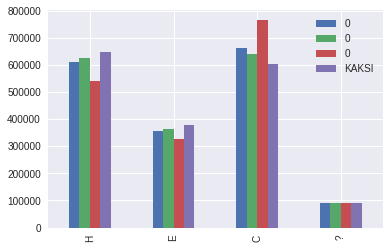

In [81]:
# freq_dssp.sum(axis=0).plot(kind='bar')
freq = pd.concat([pd.DataFrame(dt_dssp.sum(axis=0)), pd.DataFrame(dt_stride.sum(axis=0),,columns=['KAKSI']), pd.DataFrame(dt_pross.sum(axis=0),columns=['PROSS']),pd.DataFrame(dt_kaksi.sum(axis=0),columns=['KAKSI'])], axis=1)
freq.plot(kind='bar')


Gráfico das distribuições das estruturas secundárias por aminoácidos. ~~**Atenção: KAKSI não atribui o estado '?' à aminoácidos não visualizados.**~~(corrigido)

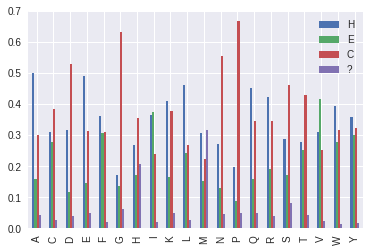

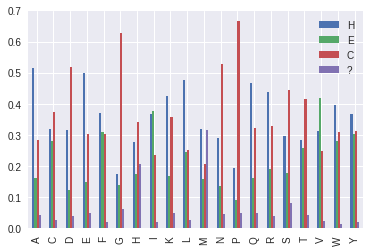

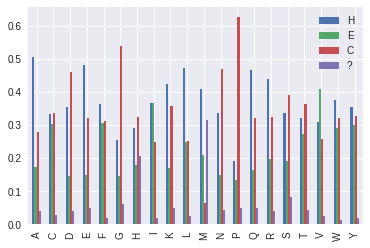

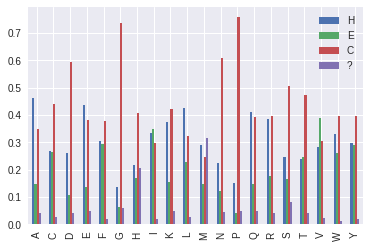

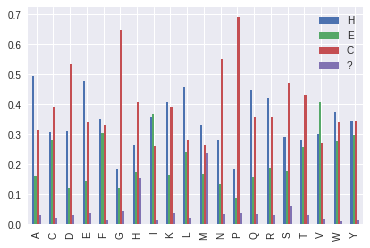

In [48]:
dt_dssp_norm.plot.bar()
dt_stride_norm.plot.bar()
dt_kaksi_norm.plot.bar()
dt_pross_norm.plot.bar()
dt_all_norm.plot.bar()

Gráfico das distribuições das estruturas secundárias por aminoácidos ordenados pela diferença p(H)-p(E)

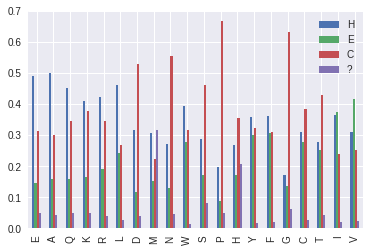

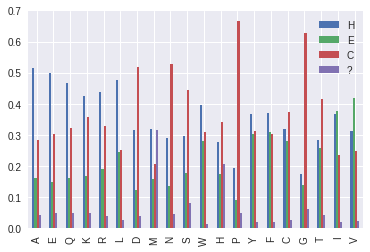

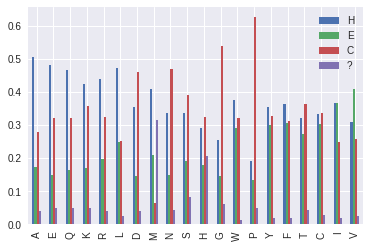

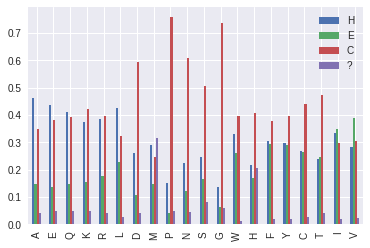

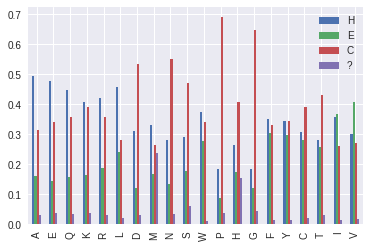

In [49]:
dt_dssp_norm['H-E'] = dt_dssp_norm['H'] - dt_dssp_norm['E']
dt_dssp_norm.sort_values('H-E', ascending=False).drop('H-E', axis=1).plot.bar()


dt_stride_norm['H-E'] = dt_stride_norm['H'] - dt_stride_norm['E']
dt_stride_norm.sort_values('H-E', ascending=False).drop('H-E', axis=1).plot.bar()

dt_kaksi_norm['H-E'] = dt_kaksi_norm['H'] - dt_kaksi_norm['E']
dt_kaksi_norm.sort_values('H-E', ascending=False).drop('H-E', axis=1).plot.bar()

dt_pross_norm['H-E'] = dt_pross_norm['H'] - dt_pross_norm['E']
dt_pross_norm.sort_values('H-E', ascending=False).drop('H-E', axis=1).plot.bar()

dt_all_norm['H-E'] = dt_all_norm['H'] - dt_all_norm['E']
dt_all_norm.sort_values('H-E', ascending=False).drop('H-E', axis=1).plot.bar()
